## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/02_class_desl_ra.csv')

In [4]:
df.head()

,Index,DESL,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,...,Monopoex (Y_N),Artifical tears,Light treatment,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.03493,...,1,0,0,3,3,0,0,23,23,0
1,P2,3,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.00000,...,1,1,0,2,4,1,3,14,18,0
2,P3,2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.00000,...,0,1,1,8,8,3,3,11,8,0
3,P4,3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.00000,...,0,1,0,3,2,2,2,12,11,0
4,P5,1,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.00000,...,1,1,1,11,11,0,0,22,32,0


In [5]:
df.iloc[:,2:44]

,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,Cyanobacteria,Coriobacteriia,...,Thermoleophilia,Mollicutes,Epsilonproteobacteria,Melainabacteria,Spartobacteria,Acidobacteria,Chloroflexia,Lentisphaeria,Nitrospira,Chlamydiae
0,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.034930,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.000000,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.000000,0.0,0.024619,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.000000,0.0,0.077015,...,0.007807,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.490105,0.192865,0.020782,0.099543,0.112119,0.030181,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
57,0.163734,0.409103,0.008402,0.079518,0.087391,0.018193,0.069794,0.133567,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
58,0.303189,0.603136,0.000000,0.010717,0.011974,0.023353,0.011313,0.000000,0.0,0.000000,...,0.000000,0.000529,0,0.0,0.0,0.0,0.0,0.0,0,0
59,0.853599,0.066684,0.000529,0.020442,0.021368,0.017333,0.009394,0.001522,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0,0


In [6]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [7]:
X = df.iloc[:,2:44]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [8]:
le = LabelEncoder()
y_xgb = le.fit_transform(y)


clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y_xgb, cv=looxgb, scoring='accuracy', return_estimator=True)


In [ ]:
xgb_scores

In [ ]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [11]:
feature_importances_complete

,Importance
Fusobacteriia,0.244167
Nitriliruptoria,0.185563
Thermoleophilia,0.121405
Elusimicrobia,0.083294
Erysipelotrichia,0.070682
...,...
Deinococci,0.000000
Verrucomicrobiae,0.000000
Gemmatimonadetes,0.000000
Cyanobacteria,0.000000


In [12]:
feature_importances_complete.shape

(2562, 1)

In [13]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [14]:
fic[:15]

,Importance
Nitriliruptoria,0.199459
Fusobacteriia,0.178225
Coriobacteriia,0.081697
Deltaproteobacteria,0.075578
Erysipelotrichia,0.054202
Negativicutes,0.052915
Elusimicrobia,0.047322
Alphaproteobacteria,0.031957
Actinobacteria,0.028858
Bacteroidia,0.028255


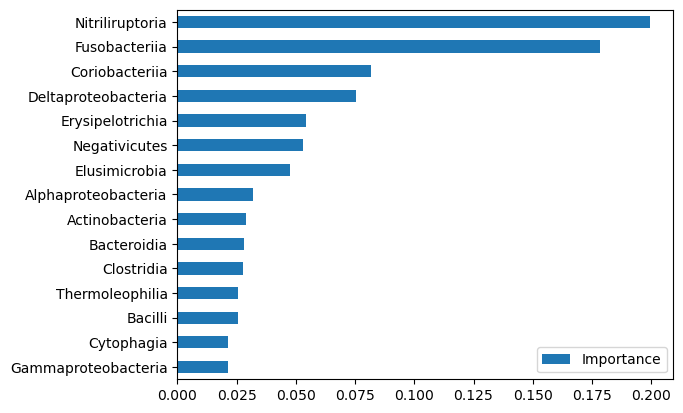

In [15]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [ ]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

In [17]:
np.shape(shap_valuesxgb)

(4, 61, 42)

In [18]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=1)

In [19]:
np.shape(shap_valuesxgb_mean)

(4, 42)

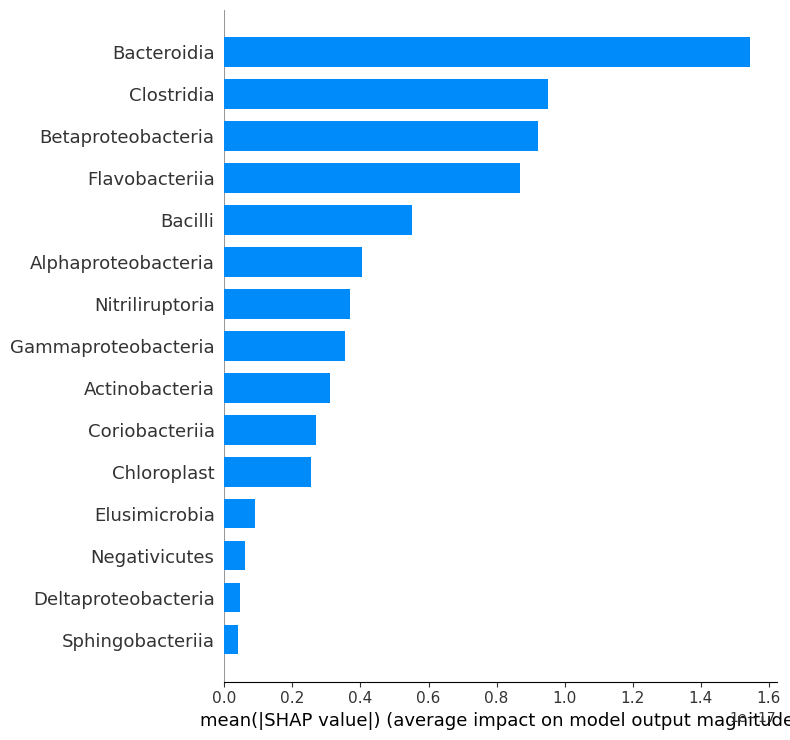

In [20]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

In [ ]:
lgbm_scores

In [ ]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [24]:
feature_importances_complete_lgb

,Importance
Bacteroidia,107
Betaproteobacteria,88
Alphaproteobacteria,76
Clostridia,71
Bacilli,67
...,...
Negativicutes,0
Erysipelotrichia,0
Deltaproteobacteria,0
Opitutae,0


In [25]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [26]:
fic_lgb[:15]

,Importance
Bacteroidia,87.918033
Clostridia,83.295082
Alphaproteobacteria,81.557377
Betaproteobacteria,78.639344
Gammaproteobacteria,52.852459
Flavobacteriia,49.754098
Bacilli,49.213115
Actinobacteria,44.721311
Rubrobacteria,0.000000
Mollicutes,0.000000


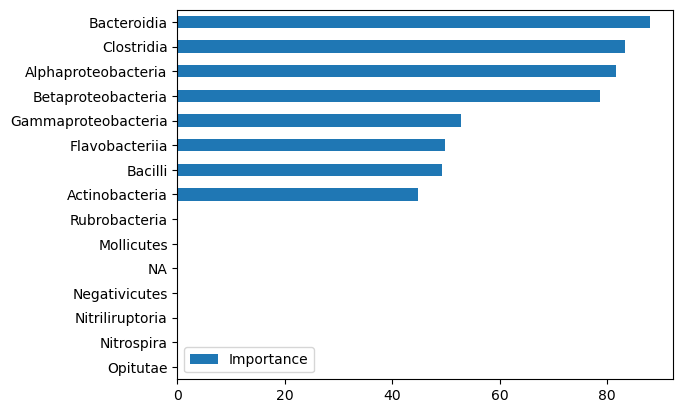

In [27]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [28]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [29]:
np.shape(shap_valueslgb)

(4, 61, 42)

In [30]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=1)

In [31]:
np.shape(shap_valueslgb_mean)

(4, 42)

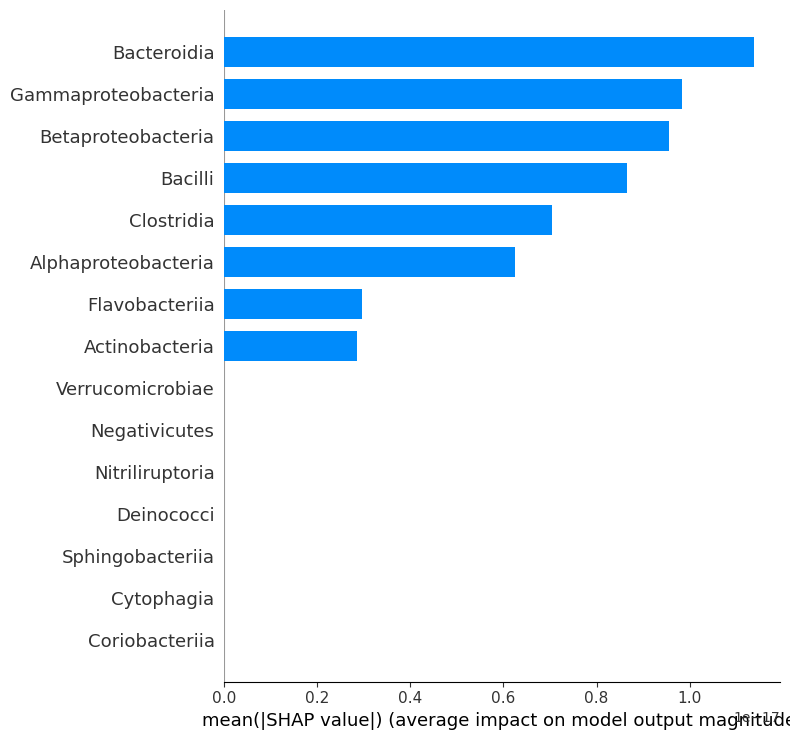

In [32]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15)

### Multilayer perceptron 

In [33]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [ ]:
mlp_scores

In [ ]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [36]:
MLPfeatures.shape

(42, 2)

In [37]:
MLP_feature_importances_complete.shape

(2562, 2)

In [38]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [39]:
fic_mlp.shape

(42, 1)

In [40]:
fic_mlp[:15]

,Importance
Features,
Actinobacteria,0.292623
Clostridia,0.256557
Bacilli,0.193443
Alphaproteobacteria,0.153279
Gammaproteobacteria,0.145082
Betaproteobacteria,0.086885
Bacteroidia,0.077869
Flavobacteriia,0.050820
Sphingobacteriia,0.050000


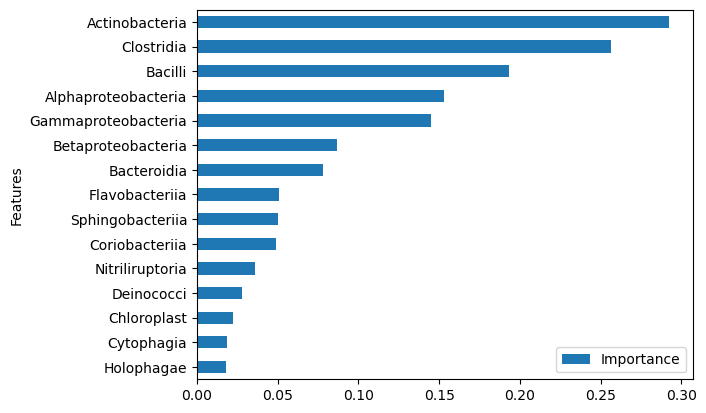

In [41]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [42]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

In [43]:
np.shape(shap_valuesmlp)

(61, 42)

In [44]:
shap_valuesmlp

array([[ 0.08360656,  0.01639344, -0.05081967, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06393443,  0.12295082,  0.20327869, ...,  0.00327869,
         0.        ,  0.        ],
       [ 0.18852459, -0.29508197, -0.00983607, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.09672131, -0.32622951,  0.11803279, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05245902,  0.03278689, -0.10163934, ...,  0.00327869,
         0.        ,  0.        ],
       [ 0.11147541, -0.16721311,  0.01311475, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [46]:
np.shape(shap_valuesmlp_mean)

(1, 42)

In [ ]:
shap_valueslgb_mean

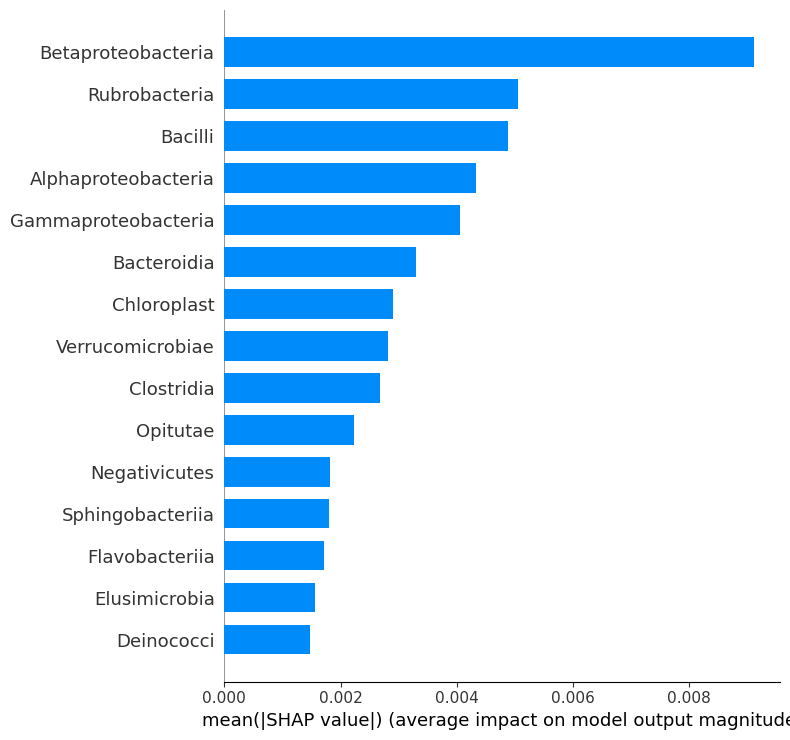

In [48]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15)